In [181]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

#Constant data
DATA = pd.read_csv("Report_Bimbo.csv")

#Date = pd.DataFrame({'Date': [f"{datetime.fromordinal(datetime(1900, 1, 1).toordinal() + i - 2):%Y-%m-%d}" for i in DATA['Date']]})

DATA = DATA.drop(['MAX.DIA'], 1)
DATA = DATA.drop(['MIN.DIA'], 1)
DATA = DATA.drop(['VOLUMEN'], 1)
DATA = DATA.drop(['IMPORTE'], 1)
DATA = DATA.drop(['INDICE'], 1)
#DATA = pd.concat([DATA, Date], axis=1)

#used data
data = DATA[86:]

price = 'CIERRE'

latest_value = [i for i in data[price]][0]
data_len = len(data)
historic = []
historic_std = []
descriptive_hist = []
cash_flow = []
cash_flow_std = []
#Plot DATA
#DATA[::-1].plot('Date', 'Price', linewidth=0.5)

#Convertimos los datos a matriz
X1 = np.array([[float(i) for i in data[price][::-1][:-1]]]).T
X2 = np.array([[float(i) for i in data[price][::-1][:-2]]]).T
X3 = np.array([[float(i) for i in data[price][::-1][:-3]]]).T
X4 = np.array([[float(i) for i in data[price][::-1][:-4]]]).T
X5 = np.array([[float(i) for i in data[price][::-1][:-5]]]).T
X6 = np.array([[float(i) for i in data[price][::-1][:-6]]]).T
X7 = np.array([[float(i) for i in data[price][::-1][:-7]]]).T
X8 = np.array([[float(i) for i in data[price][::-1][:-8]]]).T
X9 = np.array([[float(i) for i in data[price][::-1][:-9]]]).T
X10 = np.array([[float(i) for i in data[price][::-1][:-10]]]).T
X11 = np.array([[float(i) for i in data[price][::-1][:-11]]]).T
X12 = np.array([[float(i) for i in data[price][::-1][:-12]]]).T
X13 = np.array([[float(i) for i in data[price][::-1][:-13]]]).T
X14 = np.array([[float(i) for i in data[price][::-1][:-14]]]).T

X = np.append(X1[1:], X2, axis=1)
X = np.append(X[1:], X3, axis=1)
X = np.append(X[1:], X4, axis=1)
X = np.append(X[1:], X5, axis=1)
X = np.append(X[1:], X6, axis=1)
X = np.append(X[1:], X7, axis=1)
X = np.append(X[1:], X8, axis=1)
X = np.append(X[1:], X9, axis=1)
X = np.append(X[1:], X10, axis=1)
X = np.append(X[1:], X11, axis=1)
X = np.append(X[1:], X12, axis=1)
X = np.append(X[1:], X13, axis=1)
X = np.append(X[1:], X14, axis=1)

#Guardamos la funcion para escalar los datos
X_scale = StandardScaler()

#Escalamos los datos de -2 a 2
X = X_scale.fit_transform(X)

#Guardamos los cierres
y = np.array([data[price][::-1][14:]]).T

#Hacemos el split para tener datos para entrenar y probar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

def ann():
    """
    loss functions:
    mean_absolute_error
    mean_squared_error
    mean_squared_logarithmic_error
    """
    global model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(14, activation='relu', input_shape=X_train.shape[1:]),
        tf.keras.layers.Dense(7, activation='relu'),
        tf.keras.layers.Dense(2, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['mean_squared_error'])

    global history
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300)

    # evaluate the model
    global train_mse
    train_mse = model.evaluate(X_train, y_train)
    global test_mse
    test_mse = model.evaluate(X_test, y_test)

def plot_loss():
    # plot loss during training
    plt.subplot(211)
    plt.title('Loss')
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()

    # plot mse during training
    plt.subplot(212)
    plt.title('Mean Squared Error')
    plt.plot(history.history['mean_squared_error'], label='train')
    plt.plot(history.history['val_mean_squared_error'], label='test')
    plt.legend()
    plt.show()

def plot_pred_test():
    prediction = model.predict(X_test)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(y_test, label="Real Values", color="blue")
    ax.plot(prediction, label="Predicted Values", color="orange")
    ax.set_aspect('auto')
    plt.show()

ann()    

def predict_values(data):
    results_li = []

    result = model.predict(np.array([X[-1]]))
    #results_li.append(result[0][0])

    X1 = np.array([[float(i) for i in data[price][::-1][:-1]]]).T
    X2 = np.array([[float(i) for i in data[price][::-1][:-2]]]).T
    X3 = np.array([[float(i) for i in data[price][::-1][:-3]]]).T
    X4 = np.array([[float(i) for i in data[price][::-1][:-4]]]).T
    X5 = np.array([[float(i) for i in data[price][::-1][:-5]]]).T
    X6 = np.array([[float(i) for i in data[price][::-1][:-6]]]).T
    X7 = np.array([[float(i) for i in data[price][::-1][:-7]]]).T
    X8 = np.array([[float(i) for i in data[price][::-1][:-8]]]).T
    X9 = np.array([[float(i) for i in data[price][::-1][:-9]]]).T
    X10 = np.array([[float(i) for i in data[price][::-1][:-10]]]).T
    X11 = np.array([[float(i) for i in data[price][::-1][:-11]]]).T
    X12 = np.array([[float(i) for i in data[price][::-1][:-12]]]).T
    X13 = np.array([[float(i) for i in data[price][::-1][:-13]]]).T
    X14 = np.array([[float(i) for i in data[price][::-1][:-14]]]).T

    X14 = np.append(X14, X13[-1])
    X13 = np.append(X13, X12[-1])
    X12 = np.append(X12, X11[-1])
    X11 = np.append(X11, X10[-1])
    X10 = np.append(X10, X9[-1])
    X9 = np.append(X9, X8[-1])
    X8 = np.append(X8, X7[-1])
    X7 = np.append(X7, X6[-1])
    X6 = np.append(X6, X5[-1])
    X5 = np.append(X5, X4[-1])
    X4 = np.append(X4, X3[-1])
    X3 = np.append(X3, X2[-1])
    X2 = np.append(X2, X1[-1])
    X1 = np.append(X1, result[-1][0])

    X1 = X1.reshape(len(X1), 1)
    X2 = X2.reshape(len(X2), 1)
    X3 = X3.reshape(len(X3), 1)
    X4 = X4.reshape(len(X4), 1)
    X5 = X5.reshape(len(X5), 1)
    X6 = X6.reshape(len(X6), 1)
    X7 = X7.reshape(len(X7), 1)
    X8 = X8.reshape(len(X8), 1)
    X9 = X9.reshape(len(X9), 1)
    X10 = X10.reshape(len(X10), 1)
    X11 = X11.reshape(len(X11), 1)
    X12 = X12.reshape(len(X12), 1)
    X13 = X13.reshape(len(X13), 1)
    X14 = X14.reshape(len(X14), 1)

    Xt = np.append(X1[1:], X2, axis=1)
    Xt = np.append(Xt[1:], X3, axis=1)
    Xt = np.append(Xt[1:], X4, axis=1)
    Xt = np.append(Xt[1:], X5, axis=1)
    Xt = np.append(Xt[1:], X6, axis=1)
    Xt = np.append(Xt[1:], X7, axis=1)
    Xt = np.append(Xt[1:], X8, axis=1)
    Xt = np.append(Xt[1:], X9, axis=1)
    Xt = np.append(Xt[1:], X10, axis=1)
    Xt = np.append(Xt[1:], X11, axis=1)
    Xt = np.append(Xt[1:], X12, axis=1)
    Xt = np.append(Xt[1:], X13, axis=1)
    Xt = np.append(Xt[1:], X14, axis=1)

    XTT = X_scale.fit_transform(Xt)

    df_result = pd.DataFrame(result, columns=[price])
    data = data[::-1]
    data = data.append(df_result, ignore_index=True, sort=True)
    data = data[::-1]

    for num in range(3):
        result = model.predict(np.array([XTT[-1]]))
        results_li.append(result[0][0])

        X1 = np.array([[float(i) for i in data[price][::-1]]]).T
        X2 = np.array([[float(i) for i in data[price][::-1][:-1]]]).T
        X3 = np.array([[float(i) for i in data[price][::-1][:-2]]]).T
        X4 = np.array([[float(i) for i in data[price][::-1][:-3]]]).T
        X5 = np.array([[float(i) for i in data[price][::-1][:-4]]]).T
        X6 = np.array([[float(i) for i in data[price][::-1][:-5]]]).T
        X7 = np.array([[float(i) for i in data[price][::-1][:-6]]]).T
        X8 = np.array([[float(i) for i in data[price][::-1][:-7]]]).T
        X9 = np.array([[float(i) for i in data[price][::-1][:-8]]]).T
        X10 = np.array([[float(i) for i in data[price][::-1][:-9]]]).T
        X11 = np.array([[float(i) for i in data[price][::-1][:-10]]]).T
        X12 = np.array([[float(i) for i in data[price][::-1][:-11]]]).T
        X13 = np.array([[float(i) for i in data[price][::-1][:-12]]]).T
        X14 = np.array([[float(i) for i in data[price][::-1][:-13]]]).T

        X14 = np.append(X14, X13[-1])
        X13 = np.append(X13, X12[-1])
        X12 = np.append(X12, X11[-1])
        X11 = np.append(X11, X10[-1])
        X10 = np.append(X10, X9[-1])
        X9 = np.append(X9, X8[-1])
        X8 = np.append(X8, X7[-1])
        X7 = np.append(X7, X6[-1])
        X6 = np.append(X6, X5[-1])
        X5 = np.append(X5, X4[-1])
        X4 = np.append(X4, X3[-1])
        X3 = np.append(X3, X2[-1])
        X2 = np.append(X2, X1[-1])
        X1 = np.append(X1, result[-1][0])

        X1 = X1.reshape(len(X1), 1)
        X2 = X2.reshape(len(X2), 1)
        X3 = X3.reshape(len(X3), 1)
        X4 = X4.reshape(len(X4), 1)
        X5 = X5.reshape(len(X5), 1)
        X6 = X6.reshape(len(X6), 1)
        X7 = X7.reshape(len(X7), 1)
        X8 = X8.reshape(len(X8), 1)
        X9 = X9.reshape(len(X9), 1)
        X10 = X10.reshape(len(X10), 1)
        X11 = X11.reshape(len(X11), 1)
        X12 = X12.reshape(len(X12), 1)
        X13 = X13.reshape(len(X13), 1)
        X14 = X14.reshape(len(X14), 1)

        Xt = np.append(X1[1:], X2, axis=1)
        Xt = np.append(Xt[1:], X3, axis=1)
        Xt = np.append(Xt[1:], X4, axis=1)
        Xt = np.append(Xt[1:], X5, axis=1)
        Xt = np.append(Xt[1:], X6, axis=1)
        Xt = np.append(Xt[1:], X7, axis=1)
        Xt = np.append(Xt[1:], X8, axis=1)
        Xt = np.append(Xt[1:], X9, axis=1)
        Xt = np.append(Xt[1:], X10, axis=1)
        Xt = np.append(Xt[1:], X11, axis=1)
        Xt = np.append(Xt[1:], X12, axis=1)
        Xt = np.append(Xt[1:], X13, axis=1)
        Xt = np.append(Xt[1:], X14, axis=1)

        XTT = X_scale.fit_transform(Xt)

        df_result = pd.DataFrame(result, columns=[price])
        data = data[::-1]
        data = data.append(df_result, ignore_index=True, sort=True)
        data = data[::-1]

    return results_li

results_li = predict_values(data)
bought = False
mxn = 100000
actions = 0
bought_price = 0
top_price = 0

def buy(mxn_input, actions_input, rate):
    global actions
    global mxn
    global bought_price
    
    actions += (mxn_input/rate)
    mxn -= (actions*rate)
    bought_price = rate
    top_price = bought_price

def sell(mxn_input, actions_input, rate):
    global actions
    global mxn
    
    mxn += (actions_input*rate)
    actions -= (mxn/rate)
    
if not bought:
    if latest_value * 1.01 < max(results_li):
        buy(mxn, actions, latest_value)
        bought = True

if bought:
    if latest_value > top_price and bought_price < latest_value:
        top_price = latest_value
        
    if bought_price*1.02 < latest_value:
        sell(mxn, actions, latest_value)
        bought = False
        
    elif bought_price/1.01 >= latest_value:
        sell(mxn, actions, latest_value)
        bought = False
        
    elif latest_value > max(results_li):
        sell(mxn, actions, latest_value)
        bought = False

bought_std = False
mxn_std = 100000
actions_std = 0
bought_price_std = 0
top_price_std = 0
average = sum([i for i in data[price]]) / len([i for i in data[price]])
standard_dev = np.std([i for i in data[price]])

def buy_std(mxn_input, actions_input, rate):
    global actions_std
    global mxn_std
    global bought_price_std
    
    actions_std += (mxn_input/rate)
    mxn_std -= (actions_std*rate)
    bought_price_std = rate
    top_price_std = bought_price_std

def sell_std(mxn_input, actions_input, rate):
    global actions_std
    global mxn_std
    
    mxn_std += (actions_input*rate)
    actions_std -= (mxn_std/rate)

if not bought_std:
    if latest_value -(1.3*standard_dev) <= average:
        buy_std(mxn_std, actions_std, latest_value)
        bought_std = True

if bought_std:
    if latest_value + (1.3*standard_dev) >= average:
        sell_std(mxn_std, actions_std, latest_value)
        bought_std = False

historic.append(actions)
descriptive_hist.append(f'Have {mxn} MXN, {actions}Actions')
cash_flow.append((actions*latest_value) + mxn)

historic_std.append(actions_std)
cash_flow_std.append((actions_std*latest_value) + mxn_std)

Train on 924 samples, validate on 231 samples
Epoch 1/300
924/924 [==============================] - 0s 457us/sample - loss: 1967.6024 - mean_squared_error: 1967.6024 - val_loss: 1952.1380 - val_mean_squared_error: 1952.1378
Epoch 2/300
924/924 [==============================] - 0s 95us/sample - loss: 1930.1849 - mean_squared_error: 1930.1848 - val_loss: 1912.0108 - val_mean_squared_error: 1912.0109
Epoch 3/300
924/924 [==============================] - 0s 93us/sample - loss: 1876.6191 - mean_squared_error: 1876.6189 - val_loss: 1849.3386 - val_mean_squared_error: 1849.3384
Epoch 4/300
924/924 [==============================] - 0s 94us/sample - loss: 1786.6351 - mean_squared_error: 1786.6349 - val_loss: 1739.6759 - val_mean_squared_error: 1739.6760
Epoch 5/300
924/924 [==============================] - 0s 103us/sample - loss: 1635.2175 - mean_squared_error: 1635.2174 - val_loss: 1564.6601 - val_mean_squared_error: 1564.6600
Epoch 6/300
924/924 [==============================] - 0s 107u

In [182]:
for i in range(1, 86):
    data = DATA[data[::-1].index[-1] - 1:]
    latest_value = [i for i in data[price]][0]
    data_len = len(data)
    results_li = predict_values(data)
    
    if not bought:
        if latest_value * 1.01 < max(results_li):
            buy(mxn, actions, latest_value)
            bought = True

    if bought:
        if latest_value > top_price and bought_price < latest_value:
            top_price = latest_value

        if bought_price*1.02 < latest_value:
            sell(mxn, actions, latest_value)
            bought = False

        elif bought_price/1.01 >= latest_value:
            sell(mxn, actions, latest_value)
            bought = False

        elif latest_value > max(results_li):
            sell(mxn, actions, latest_value)
            bought = False

    #STANDARD DEV
    if not bought_std:
        if latest_value -(1.3*standard_dev) <= average:
            buy_std(mxn_std, actions_std, latest_value)
            bought_std = True

    if bought_std:
        if latest_value + (1.3*standard_dev) >= average:
            sell_std(mxn_std, actions_std, latest_value)
            bought_std = False

            
    historic.append(actions)
    descriptive_hist.append(f'Have {mxn} MXN, {actions} Actions')
    cash_flow.append((actions*latest_value) + mxn)
    
    historic_std.append(actions_std)
    cash_flow_std.append((actions_std*latest_value) + mxn_std)

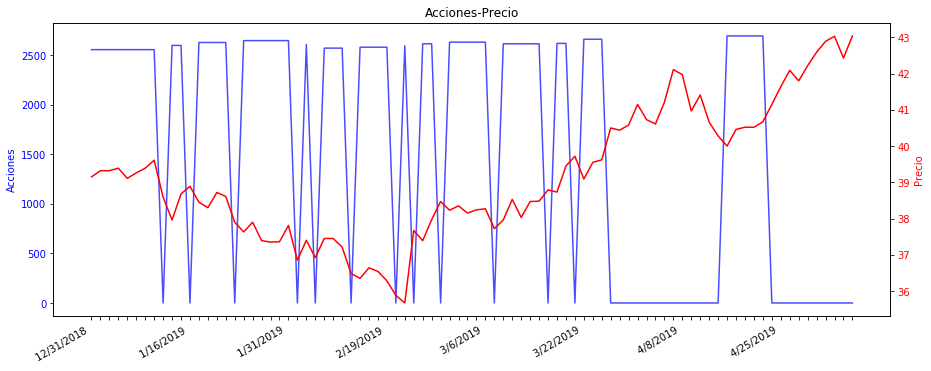

In [183]:
fig, ax = plt.subplots(figsize=(15,6))
plt.title('Acciones-Precio')
ax.plot(data['FECHA'][:86][::-1], historic, color='blue', alpha=0.7)
ax.set_ylabel('Acciones', color='blue')
fig.autofmt_xdate()
ax.tick_params(axis='y', labelcolor='blue')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Precio', color='red')  # we already handled the x-label with ax1
ax2.plot(data['FECHA'][:86][::-1], data[price][:86][::-1], color='red')
ax2.tick_params(axis='y', labelcolor='red')

every_nth = 11
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

fig.autofmt_xdate()
plt.show()

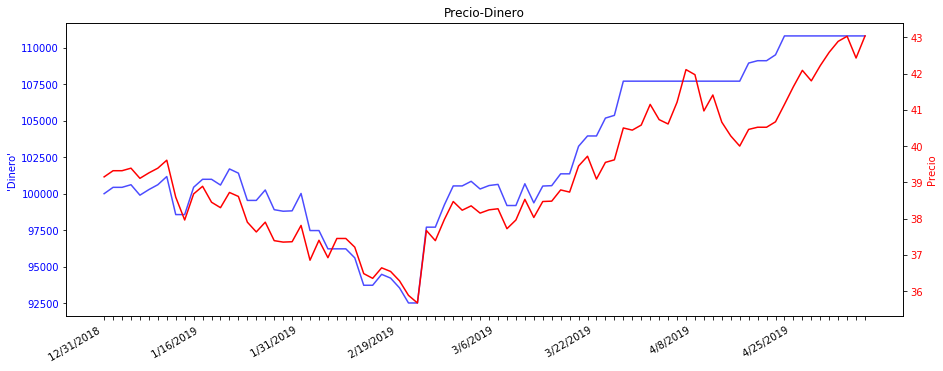

In [184]:
fig, ax = plt.subplots(figsize=(15,6))
plt.title('Precio-Dinero')
ax.plot(data['FECHA'][:86][::-1], cash_flow, color='blue', alpha=0.7)
ax.set_ylabel("'Dinero'", color='blue')
fig.autofmt_xdate()
ax.tick_params(axis='y', labelcolor='blue')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Precio', color='red')  # we already handled the x-label with ax1
ax2.plot(data['FECHA'][:86][::-1], data[price][:86][::-1], color='red')
ax2.tick_params(axis='y', labelcolor='red')

every_nth = 11
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

fig.autofmt_xdate()
plt.show()

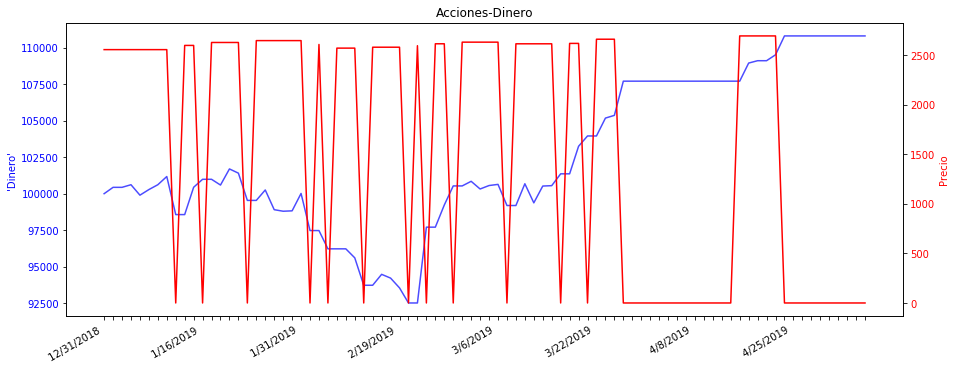

In [185]:
fig, ax = plt.subplots(figsize=(15,6))
plt.title('Acciones-Dinero')
ax.plot(data['FECHA'][:86][::-1], cash_flow, color='blue', alpha=0.7)
ax.set_ylabel("'Dinero'", color='blue')
fig.autofmt_xdate()
ax.tick_params(axis='y', labelcolor='blue')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Precio', color='red')  # we already handled the x-label with ax1
ax2.plot(data['FECHA'][:86][::-1], historic, color='red')
ax2.tick_params(axis='y', labelcolor='red')

every_nth = 11
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

fig.autofmt_xdate()
plt.show()

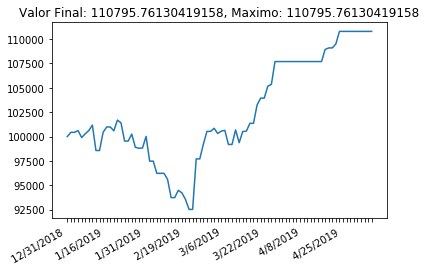

In [186]:
fig, ax = plt.subplots()
plt.plot(data['FECHA'][:86][::-1], cash_flow)
every_nth = 11
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
fig.autofmt_xdate()
plt.title(f"Valor Final: {cash_flow[-1]}, Maximo: {max(cash_flow)}")
plt.show()

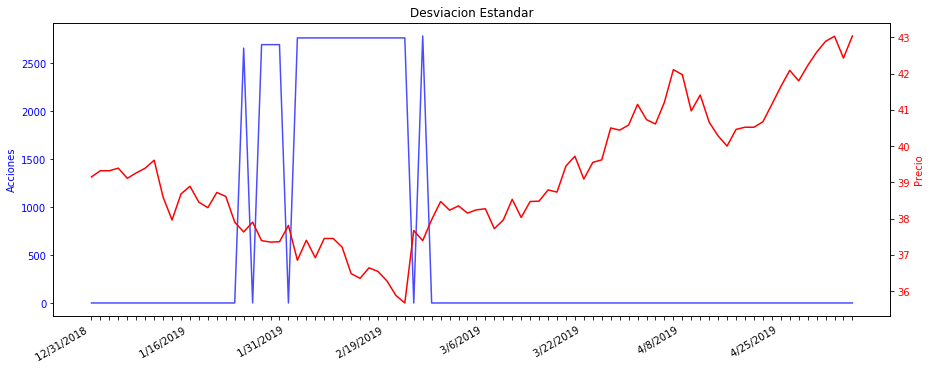

In [187]:
fig, ax = plt.subplots(figsize=(15,6))
plt.title('Desviacion Estandar')
ax.plot(data['FECHA'][:86][::-1], historic_std, color='blue', alpha=0.7)
ax.set_ylabel('Acciones', color='blue')
fig.autofmt_xdate()
ax.tick_params(axis='y', labelcolor='blue')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Precio', color='red')  # we already handled the x-label with ax1
ax2.plot(data['FECHA'][:86][::-1], data[price][:86][::-1], color='red')
ax2.tick_params(axis='y', labelcolor='red')

every_nth = 11
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

fig.autofmt_xdate()
plt.show()


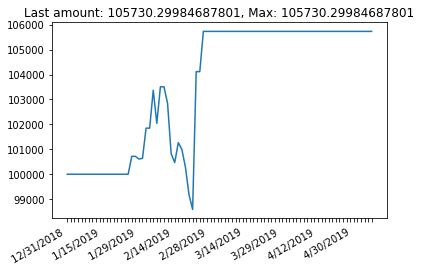

In [188]:
fig, ax = plt.subplots()
plt.plot(data['FECHA'][:86][::-1], cash_flow_std)
every_nth = 10
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
fig.autofmt_xdate()
plt.title(f"Last amount: {cash_flow_std[-1]}, Max: {max(cash_flow_std)}")
plt.show()

In [190]:
model.save("model_bimbo.h5")